## Data cleaning and EDA

In [2]:
#import libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

import regex as re

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#import data 

reddit = pd.read_csv('./reddit_scrape.csv')
hwz = pd.read_csv('./hwz_scrape.csv')
sgtalk = pd.read_csv('./sgtalk_scrape.csv')

### Reddit data

In [4]:
display(reddit.shape)
display(reddit.info())
reddit.head()

(3622, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3622 entries, 0 to 3621
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         3622 non-null   object
 1   body          725 non-null    object
 2   comment       3622 non-null   object
 3   comment_date  3622 non-null   object
dtypes: object(4)
memory usage: 113.3+ KB


None

,title,body,comment,comment_date
0,Fake videos being spread to create trouble in ...,NaN,> # Fake videos being spread to create trouble...,2020-04-29 16:56:44
1,Fake videos being spread to create trouble in ...,NaN,Serious stuff...with serious implications for ...,2020-04-29 17:14:42
2,Fake videos being spread to create trouble in ...,NaN,Not far fetched to think that Singapore is bei...,2020-04-29 17:58:23
3,Fake videos being spread to create trouble in ...,NaN,Recently got a WA message complaining that for...,2020-04-29 17:00:19
4,Fake videos being spread to create trouble in ...,NaN,I really hope all those videos were fake or re...,2020-04-29 17:23:39


In [5]:
#convert date to pd datetime format
reddit['comment_date'] = pd.to_datetime(reddit['comment_date'])

In [6]:
#only 23 unique body posts in reddit data - drop col
len(reddit['body'].unique())

23

In [7]:
#for merged df - keep only comment and comment date 
display(reddit.isnull().sum())
display((reddit == '').sum())

title              0
body            2897
comment            0
comment_date       0
dtype: int64

title           0
body            0
comment         0
comment_date    0
dtype: int64

In [8]:
#looking for duplicate comments
display(len(reddit[reddit.duplicated(['comment'])]))
display(reddit[reddit.duplicated(['comment'])].head(10))

#most are [deleted] or [removed] - drop these cols
#rest of duplicates will be removed, first one kept 

reddit[(reddit['comment'] != '[deleted]') & (reddit['comment'] != '[removed]')]
reddit = reddit.drop_duplicates(subset='comment', keep='first')

display(reddit[reddit.duplicated(['comment'])])

128

,title,body,comment,comment_date
169,'Invest in pregnancy kits': Comments in respon...,NaN,[deleted],2020-06-04 11:31:50
212,"17 maids here have Covid-19, none infected by ...",NaN,[deleted],2020-04-23 14:43:11
236,"17 maids here have Covid-19, none infected by ...",NaN,[removed],2020-04-23 11:54:49
267,Lockdown in sg dorms... Please try to understa...,NaN,[deleted],2020-04-05 12:58:45
272,Lockdown in sg dorms... Please try to understa...,NaN,[removed],2020-04-05 13:48:22
278,Lockdown in sg dorms... Please try to understa...,NaN,[deleted],2020-04-05 21:01:05
332,Just a personal observation that opposition pa...,Nothing making any judgement here but I feel t...,[deleted],2020-07-01 01:46:50
334,Just a personal observation that opposition pa...,Nothing making any judgement here but I feel t...,[deleted],2020-07-01 01:46:11
335,Just a personal observation that opposition pa...,Nothing making any judgement here but I feel t...,[deleted],2020-07-01 01:45:19
337,Just a personal observation that opposition pa...,Nothing making any judgement here but I feel t...,[deleted],2020-07-01 03:42:55


,title,body,comment,comment_date


In [9]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494 entries, 0 to 3621
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         3494 non-null   object        
 1   body          704 non-null    object        
 2   comment       3494 non-null   object        
 3   comment_date  3494 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 136.5+ KB


### HWZ data

In [10]:
display(hwz.shape)
display(hwz.info())
hwz.head()

(6286, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6286 entries, 0 to 6285
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   post    6177 non-null   object
 1   date    6286 non-null   object
 2   title   6286 non-null   object
dtypes: object(3)
memory usage: 147.5+ KB


None

,post,date,title
0,NaN,"13-04-2020, 11:05 AM",Life In Isolation: Inside Singapore's Foreign...
1,"Not bad, got free wifi, washing machine, washi...","13-04-2020, 04:20 PM",Life In Isolation: Inside Singapore's Foreign...
2,After sooooo many years of exploitation pappie...,"13-04-2020, 04:24 PM",Life In Isolation: Inside Singapore's Foreign...
3,there are many homeless ppl in sg...living wor...,"13-04-2020, 04:24 PM",Life In Isolation: Inside Singapore's Foreign...
4,Should listen to SDP buibui Kirsten Han and ho...,"13-04-2020, 04:26 PM",Life In Isolation: Inside Singapore's Foreign...


In [11]:
#convert date to pd datetime format
hwz['date'] = pd.to_datetime(hwz['date'])

In [12]:
#keep post and date for merged dataframe 
#check for null data 
display(hwz.isnull().sum())
display((hwz == '').sum())

#109 null values in post - fill with nopost 
hwz.fillna('nopost', inplace=True)
display(hwz.isnull().sum())

post     109
date       0
title      0
dtype: int64

post     0
date     0
title    0
dtype: int64

post     0
date     0
title    0
dtype: int64

In [13]:
#dropping duplicate rows
display(len(hwz[hwz.duplicated(['post'])]))
display(hwz[hwz.duplicated(['post'])].head(10))

hwz = hwz.drop_duplicates(subset='post', keep='first')

display(hwz[hwz.duplicated(['post'])])

201

,post,date,title
65,nopost,2020-12-04 17:20:00,Life In Isolation: Inside Singapore's Foreign...
281,nopost,2020-04-05 13:02:00,GPGT - Covid-19-free foreign workers enjoy se...
294,nopost,2020-04-05 13:12:00,GPGT - Covid-19-free foreign workers enjoy se...
297,nopost,2020-04-05 13:14:00,GPGT - Covid-19-free foreign workers enjoy se...
362,Whose fault???,2020-04-17 10:43:00,"Pappy scold sinkies for the Covid spread, tur..."
424,She should offer herself to comfort all the ba...,2020-04-14 20:01:00,All foreign worker dormitories to be 'effecti...
499,Really is considered as lockdown liao. Even es...,2020-04-14 21:52:00,All foreign worker dormitories to be 'effecti...
598,nopost,2020-04-21 18:00:00,All foreign worker dormitories to be 'effecti...
631,Should be interesting when the 2nd wave breaks...,2020-11-05 00:21:00,"S'pore looking to return foreign workers, inc..."
633,nopost,2020-11-05 00:25:00,"S'pore looking to return foreign workers, inc..."


,post,date,title


In [14]:
hwz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6085 entries, 0 to 6285
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   post    6085 non-null   object        
 1   date    6085 non-null   datetime64[ns]
 2   title   6085 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 190.2+ KB


### Sgtalk data

In [15]:
display(sgtalk.shape)
sgtalk.head()

(727, 3)

,post,date,title
0,SINGAPORE - The Government will be footing the...,11-5-2020 9:10 PM,Govt to absorb additional operational costs fo...
1,Wow! Ownself pay ownself with taxpayers $$$!,11-5-2020 9:15 PM,Govt to absorb additional operational costs fo...
2,Our govt like damm rich and spend money like d...,11-5-2020 9:16 PM,Govt to absorb additional operational costs fo...
3,Our govt like damm rich and spend money like d...,11-5-2020 9:19 PM,Govt to absorb additional operational costs fo...
4,Since when any govt have money but from taxpayers,11-5-2020 9:24 PM,Govt to absorb additional operational costs fo...


In [16]:
#convert date to pd datetime format
sgtalk['date'] = pd.to_datetime(sgtalk['date'])

In [17]:
#keep post and date for merged dataframe 
#check for null data 
display(sgtalk.isnull().sum())
display((sgtalk == '').sum())

#18 null values in post - fill with nopost 
sgtalk.fillna('nopost', inplace=True)
display(sgtalk.isnull().sum())

post     18
date      0
title     0
dtype: int64

post     0
date     0
title    0
dtype: int64

post     0
date     0
title    0
dtype: int64

In [18]:
#dropping duplicate rows
display(len(sgtalk[sgtalk.duplicated(['post'])]))
display(sgtalk[sgtalk.duplicated(['post'])].head(10))

sgtalk = sgtalk.drop_duplicates(subset='post', keep='first')

display(sgtalk[sgtalk.duplicated(['post'])])

31

,post,date,title
34,nopost,2020-11-05 22:29:00,Govt to absorb additional operational costs fo...
88,nopost,2020-05-16 12:10:00,Govt to absorb additional operational costs fo...
89,nopost,2020-05-16 12:11:00,Govt to absorb additional operational costs fo...
125,I’m also landlord. If my tenants infected with...,2020-05-13 21:10:00,Netizens praise WP’s Png Eng Huat for asking i...
200,Aiyah trust me.. she will still be minister af...,2020-06-06 11:28:00,Ministers Tharman and Teo Chee Hean brought in...
260,I think Pap need 1000 ministers. Population to...,2020-07-06 11:36:00,Ministers Tharman and Teo Chee Hean brought in...
292,"If we were to analyse it, the dormitories are ...",2020-04-13 10:29:00,Dormitory operators should be fined for endang...
342,nopost,2020-04-29 17:07:00,Dormitory operators should be fined for endang...
354,nopost,2020-05-05 11:01:00,Dormitory operators should be fined for endang...
364,talk what cock??? we want leader to have fores...,2020-09-04 22:02:00,"Lawrence Wong: Unfortunately, we do not have t..."


,post,date,title


In [19]:
sgtalk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 726
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   post    696 non-null    object        
 1   date    696 non-null    datetime64[ns]
 2   title   696 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 21.8+ KB


### Merged dataframe

In [20]:
reddit_merge = reddit[['comment', 'comment_date']]
reddit_merge.rename(columns = {'comment': 'post', 'comment_date':'date'}, inplace=True)
reddit_merge['source'] = 'reddit'
display(reddit_merge.head(2))

hwz_merge = hwz[['post', 'date']]
hwz_merge['source'] = 'hardwarezone'
display(hwz_merge.head(2))

sgtalk_merge = sgtalk[['post', 'date']]
sgtalk_merge['source'] = 'sgtalk'
display(sgtalk_merge.head(2))

/Users/dorafoong/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/dorafoong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,post,date,source
0,> # Fake videos being spread to create trouble...,2020-04-29 16:56:44,reddit
1,Serious stuff...with serious implications for ...,2020-04-29 17:14:42,reddit


,post,date,source
0,nopost,2020-04-13 11:05:00,hardwarezone
1,"Not bad, got free wifi, washing machine, washi...",2020-04-13 16:20:00,hardwarezone


,post,date,source
0,SINGAPORE - The Government will be footing the...,2020-11-05 21:10:00,sgtalk
1,Wow! Ownself pay ownself with taxpayers $$$!,2020-11-05 21:15:00,sgtalk


In [21]:
#merge all 3 dataframes
all_posts = pd.concat([reddit_merge, hwz_merge, sgtalk_merge], axis=0)
display(all_posts.info())
display(all_posts.shape)
all_posts.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10275 entries, 0 to 726
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   post    10275 non-null  object        
 1   date    10275 non-null  datetime64[ns]
 2   source  10275 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 321.1+ KB


None

(10275, 3)

,post,date,source
0,> # Fake videos being spread to create trouble...,2020-04-29 16:56:44,reddit
1,Serious stuff...with serious implications for ...,2020-04-29 17:14:42,reddit
2,Not far fetched to think that Singapore is bei...,2020-04-29 17:58:23,reddit
3,Recently got a WA message complaining that for...,2020-04-29 17:00:19,reddit
4,I really hope all those videos were fake or re...,2020-04-29 17:23:39,reddit


In [22]:
#making sure there are no duplicate rows for post
len(all_posts[all_posts.duplicated(['post'])])
display(all_posts[all_posts.duplicated(['post'])])

all_posts = all_posts.drop_duplicates(subset='post', keep='first')

,post,date,source
15,,2020-11-05 21:53:00,sgtalk
22,nopost,2020-11-05 22:05:00,sgtalk


In [23]:
#shuffling order of rows
all_posts = all_posts.sample(frac=1).reset_index(drop=True)
all_posts.head(10)

,post,date,source
0,Can't wait to see what gahmen will do improve ...,2020-04-20 15:26:07,reddit
1,[Link to reddit post with Straits Times articl...,2020-04-05 20:39:33,reddit
2,Gov must step up and isolate them properly now...,2020-09-04 20:54:00,hardwarezone
3,you should be complaining about the levies ins...,2020-05-15 22:42:15,reddit
4,Well some commentators have said that it confu...,2020-05-30 17:35:24,reddit
5,>How do you even get paid when you don't have ...,2020-04-05 21:36:09,reddit
6,It is the fucking govts responsibity to ensure...,2020-05-03 18:38:52,reddit
7,Ironic that almost everything you said can be ...,2020-05-02 17:50:31,reddit
8,"Today so late, could be number of cases really...",2020-06-04 22:09:00,hardwarezone
9,I think for now is firefighting mode. After th...,2020-04-21 20:01:09,reddit


In [24]:
#investigation of post shows posts within with website links - will remove 
for i in range(len(all_posts)):
    all_posts['post'][i] = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', all_posts['post'][i])

/Users/dorafoong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
all_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10273 entries, 0 to 10272
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   post    10273 non-null  object        
 1   date    10273 non-null  datetime64[ns]
 2   source  10273 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 240.9+ KB


### Preprocessing of ```all_posts```

In [26]:
from nltk.corpus import stopwords

In [27]:
#first cut - removing words from stopwords that indicate sentiment 
remove_words = ["no", "not", "against", "don't", "should", "should've", "couldn", "couldn't",'didn', "didn't",
                   'doesn',"doesn't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",
                   'wouldn',"wouldn't"]
stopwords = [word for word in stopwords.words('english') if word not in remove_words]
len(stopwords)

157

In [28]:
#also adding words that are either common words, singaporean slang or noisy words from forum posts
add_words = ['foreign', 'migrant', 'worker', 'workers', 'fw', 'dorm', 'dorms', 'dormitory', 'dormitories', 'covid', 
             '19', 'cases', 'virus', 'coronavirus', 'gagt', 'ah', 'liao', 'lah', 'trt', 'huawei', 'samsung',
            'xiaomi', 'l21a', '32']
stopwords.extend(add_words)
len(stopwords)

181

In [29]:
# function for preprocessing posts
def preprocess(word):
     
    # tokenize and convert lower 
    # \w also removes punctuation - may need to add extra no punc if tokenizing does not do it
    token = RegexpTokenizer(r'\w+')
    tokens = token.tokenize(word.lower())
    
   #remove stopwords 
#     stops = set(stopwords)
    no_stop = [word for word in tokens if word not in stopwords]

    no_stopword = (' '.join(no_stop))
        
    #lemmatize words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in no_stopword]
    
    #return words as a single string 
    return(''.join(lem))

In [30]:
post_clean = []

for p in all_posts["post"]:
    post_clean.append(preprocess(p))

print(f"checking post_clean: \n{post_clean[0:5]}")

all_posts['post_clean'] = post_clean
all_posts.head(10)

checking post_clean: 
['wait see gahmen improve conditions ends housing many fws small space really biting us back hard truly feel bad fws cb lock tiny rooms one kena 10 room sure kena one thousands infected see fatalities sure not going end well', 'link reddit post straits times article op link another reddit post straits times article op', 'gov must step isolate properly careful measure separate rest us important gov wondering release mass testing moment lock hell ppl still going jogging shopping smoking decks wtf man unfair nurses docs put life risk lack measures tards dont give still going ikea', 'should complaining levies instead even bigger market distortion whatever artificial overheads', 'well commentators said confuses people dorscon orange really meant health government officials adjust stance however became public people didn know reacted']


,post,date,source,post_clean
0,Can't wait to see what gahmen will do improve ...,2020-04-20 15:26:07,reddit,wait see gahmen improve conditions ends housin...
1,[Link to reddit post with Straits Times articl...,2020-04-05 20:39:33,reddit,link reddit post straits times article op link...
2,Gov must step up and isolate them properly now...,2020-09-04 20:54:00,hardwarezone,gov must step isolate properly careful measure...
3,you should be complaining about the levies ins...,2020-05-15 22:42:15,reddit,should complaining levies instead even bigger ...
4,Well some commentators have said that it confu...,2020-05-30 17:35:24,reddit,well commentators said confuses people dorscon...
5,>How do you even get paid when you don't have ...,2020-04-05 21:36:09,reddit,even get paid fixed salary funny according mom...
6,It is the fucking govts responsibity to ensure...,2020-05-03 18:38:52,reddit,fucking govts responsibity ensure employee rig...
7,Ironic that almost everything you said can be ...,2020-05-02 17:50:31,reddit,ironic almost everything said used right back ...
8,"Today so late, could be number of cases really...",2020-06-04 22:09:00,hardwarezone,today late could number really explode
9,I think for now is firefighting mode. After th...,2020-04-21 20:01:09,reddit,think firefighting mode whole thing den u see ...


### Splitting train and test set

Splitting data into train (80%) and test set (20%)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_posts, test_posts = train_test_split(all_posts, test_size = 0.2, random_state=42)

In [33]:
display(train_posts.shape)
display(test_posts.shape)

(8218, 4)

(2055, 4)

### Preliminary EDA on train data

#### Length of posts
Removed 5 outlier posts with over 5000 words

Mean number of words is 177, length of posts in reddit generally the longest and hardware zone posts are generally the shortest

In [34]:
#length of posts 
train_posts['word_count'] = [len(x) for x in train_posts['post_clean']]
train_posts['word_count'].describe()

/Users/dorafoong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count     8218.000000
mean       166.397542
std        389.854373
min          0.000000
25%         39.000000
50%         81.000000
75%        169.000000
max      20452.000000
Name: word_count, dtype: float64

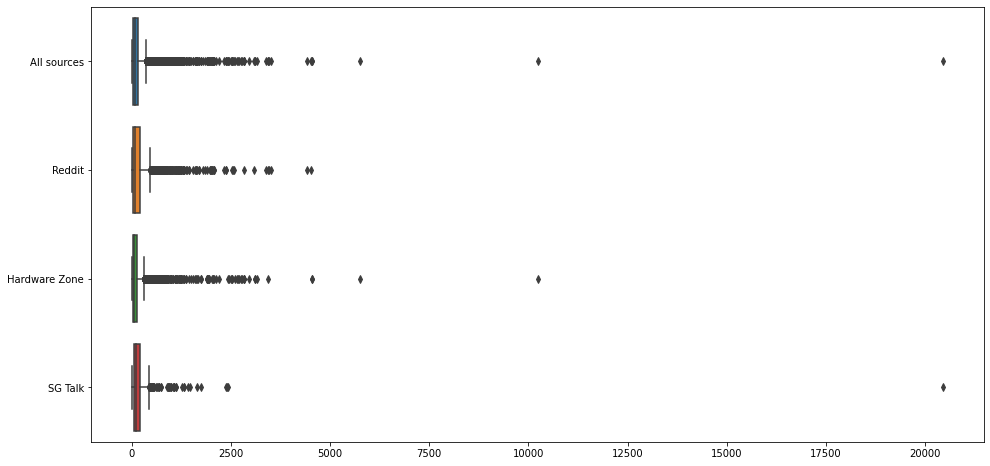

In [35]:
#plotting word count with outliers
plt.figure(figsize = (16,8))
sns.boxplot(data = [train_posts['word_count'], 
                    train_posts['word_count'][train_posts['source'] == 'reddit'],
                   train_posts['word_count'][train_posts['source'] == 'hardwarezone'],
                   train_posts['word_count'][train_posts['source'] == 'sgtalk']]
            , orient = 'h')
plt.yticks(np.arange(4), ('All sources', 'Reddit', 'Hardware Zone', 'SG Talk'));

In [36]:
#remove outlier posts of more than 5000 words 
display(train_posts[train_posts['word_count'] >=5000])

,post,date,source,post_clean,word_count
4925,The Big Read: Solving Singapore’s foreign work...,2020-11-05 10:51:00,sgtalk,big read solving singapore problem requires se...,20452
5105,Weighing Singapore's response to the Covid-19 ...,2020-04-22 10:23:00,hardwarezone,weighing singapore response pandemicdid singap...,10236
2255,Cut back on the back-patting: Singapores co...,2020-10-04 22:49:00,hardwarezone,cut back back patting singapore response loses...,5747


In [37]:
train_posts.drop([4503,5082, 3865, 3929, 8033], inplace=True)
train_posts.reset_index(drop=True)
display(train_posts[train_posts['word_count'] >=5000])

/Users/dorafoong/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,post,date,source,post_clean,word_count
4925,The Big Read: Solving Singapore’s foreign work...,2020-11-05 10:51:00,sgtalk,big read solving singapore problem requires se...,20452
5105,Weighing Singapore's response to the Covid-19 ...,2020-04-22 10:23:00,hardwarezone,weighing singapore response pandemicdid singap...,10236
2255,Cut back on the back-patting: Singapores co...,2020-10-04 22:49:00,hardwarezone,cut back back patting singapore response loses...,5747


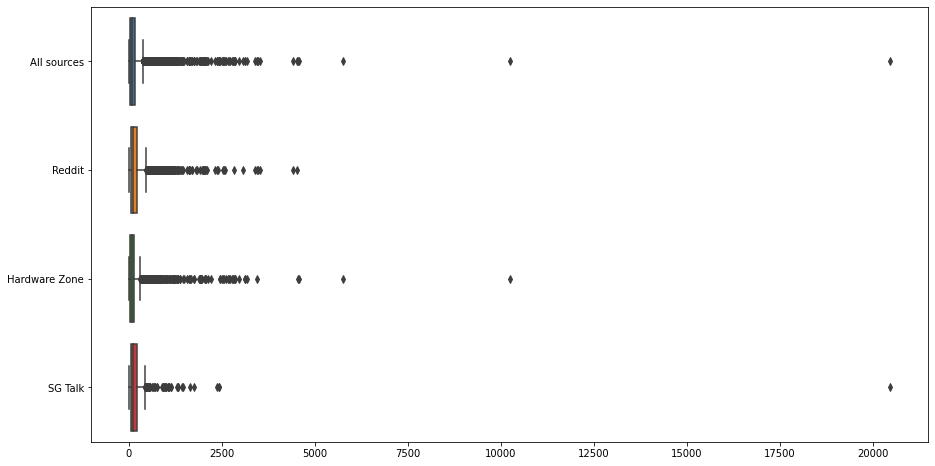

In [38]:
#plotting word count without outliers
plt.figure(figsize = (15,8))
sns.boxplot(data = [train_posts['word_count'], 
                    train_posts['word_count'][train_posts['source'] == 'reddit'],
                   train_posts['word_count'][train_posts['source'] == 'hardwarezone'],
                   train_posts['word_count'][train_posts['source'] == 'sgtalk']]
            , orient = 'h')
plt.yticks(np.arange(4), ('All sources', 'Reddit', 'Hardware Zone', 'SG Talk'));

#### Distribution of words by time

Plot shows posts written between January and December 2020. This cannot be correct as the outbreak in dorms only started in April 2020, which would be the correct start date for the posts, and the posts should end when data was scraped on 5 July 2020. An investigation into the posts written before and after April and July 2020 respectively showed that they were likely misdated on the website, and are talking about the COVID-19 outbreak in foreign worker dorms. These posts will be kept.

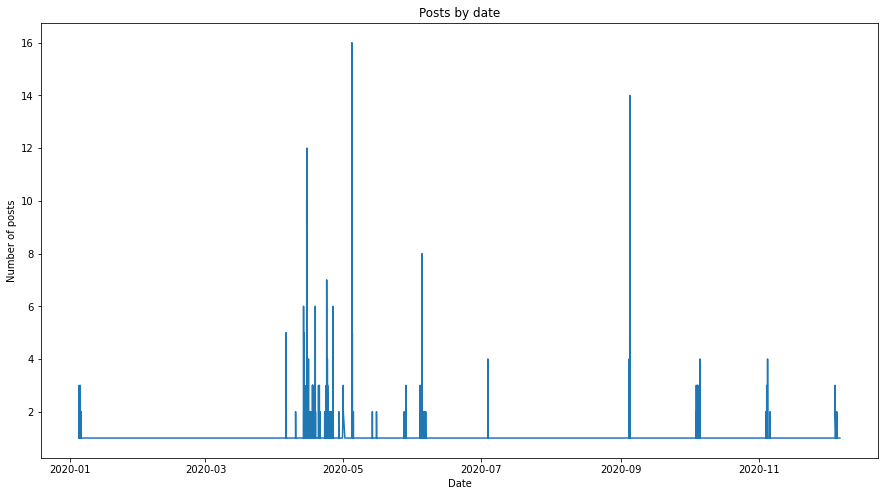

In [39]:
# plot shows that posts were written between Jan 2020 and Dec 2020, when data should reflect 
# Will remove posts before March 2020, when cases started appearing in dorms
# However, will keep posts with incorrect dates - posted after July 2020 as they are likely imputing errors
plt.figure(figsize = (15,8))
plt.plot(train_posts.groupby('date')['post'].count())
plt.title('Posts by date')
plt.xlabel('Date')
plt.ylabel('Number of posts');

In [40]:
train_posts[train_posts['date'] <'2020-03-01']

,post,date,source,post_clean,word_count
1612,And they sail back home.. haha,2020-01-05 12:52:00,hardwarezone,sail back home haha,19
9272,wait the FWs do something naughty onboard how,2020-01-05 17:06:00,hardwarezone,wait fws something naughty onboard,34
9290,Most are from Dorm.I hope the authorities gave...,2020-01-05 19:38:00,sgtalk,hope authorities gave us 2 sets reports one ou...,150
9470,Can go swimming?Sent from My Butthole using GAGT,2020-01-05 07:38:00,hardwarezone,go swimming sent butthole using,31
3412,I196 rooms how many people can u put.Got 200k ...,2020-01-05 09:19:00,hardwarezone,i196 rooms many people u put got 200k lehsay 2...,111
2340,Nah.They give 3 reports. One in the dorms. One...,2020-01-05 22:27:00,sgtalk,nah give 3 reports one one work passes outside...,186
7724,Dream Cruises and head of international sales ...,2020-01-05 16:06:00,hardwarezone,dream cruises head international sales genting...,244
57,Sinkie very good pay for abnn staycation and c...,2020-01-05 13:31:00,hardwarezone,sinkie good pay abnn staycation cruises,39
6951,genting of course happy lahthe entire world no...,2020-01-05 17:28:00,hardwarezone,genting course happy lahthe entire world no on...,189
7877,Like those seesaw up one day down the next and...,2020-01-05 18:59:00,sgtalk,like seesaw one day next think depends many fw...,58


In [41]:
train_posts[train_posts['date'] > '2020-07-05']

,post,date,source,post_clean,word_count
3509,There is no new cluster beside the dorm for tw...,2020-10-04 08:34:00,hardwarezone,no new cluster beside two days,30
59,Ho seh liao,2020-09-04 21:43:00,hardwarezone,ho seh,6
1550,Wong said that it was a very unpredictable sit...,2020-09-04 21:37:00,sgtalk,wong said unpredictable situation w n press co...,885
3274,if tomorrow STI still green or little red cons...,2020-09-04 20:52:00,hardwarezone,tomorrow sti still green little red consperm m...,56
2484,Design and Built according to specifications a...,2020-11-05 23:46:00,sgtalk,design built according specifications time ins...,242
211,"Relax , it just a normal flu",2020-09-04 20:25:00,hardwarezone,relax normal flu,16
6854,Anyone heard pinky speech? Such hypocrisy. Yea...,2020-10-04 18:44:00,hardwarezone,anyone heard pinky speech hypocrisy years expl...,223
4165,Song bo?,2020-09-04 20:36:00,hardwarezone,song bo,7
12,Do you have a solution to these problem? Lets...,2020-09-04 20:27:00,hardwarezone,solution problem let hear tekong many empty bu...,53
6814,Everybody initially worried chinese. Indians a...,2020-09-04 20:33:00,hardwarezone,everybody initially worried chinese indians bi...,59


#### Top words for each source

In [42]:
def plots(series, source):
    
    cvec = CountVectorizer(stop_words = 'english', ngram_range=(1,2))
    cvec.fit_transform(series)
    series_df = pd.DataFrame(cvec.fit_transform(series).toarray(), 
                             columns=cvec.get_feature_names())
    wordcount_df = pd.DataFrame(series_df.sum().sort_values(ascending=False).head(50), 
                                  columns=['count'])
    
    #barplot 
    plt.figure(figsize = (12,8))
    sns.barplot(y = wordcount_df.index, x = 'count', data = wordcount_df, 
                palette = 'magma')
    plt.title(f'Top 50 words used in {source}', fontsize= 18)
    plt.xlabel('Word Count', fontsize = 14)
    plt.ylabel('Words',fontsize = 14)
    
    #wordcloud
    wc = WordCloud(max_words=100, background_color="white", 
                   colormap = 'magma').generate(series.to_string())
    plt.figure(figsize = (10,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Top words used in {source}', fontsize= 18)

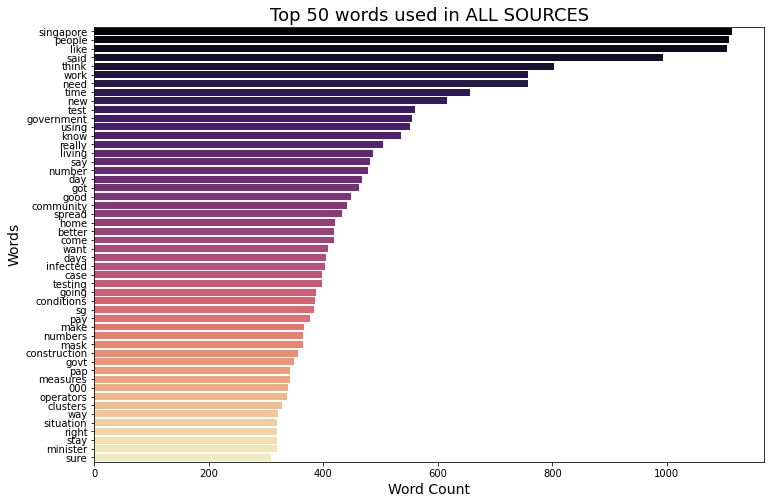

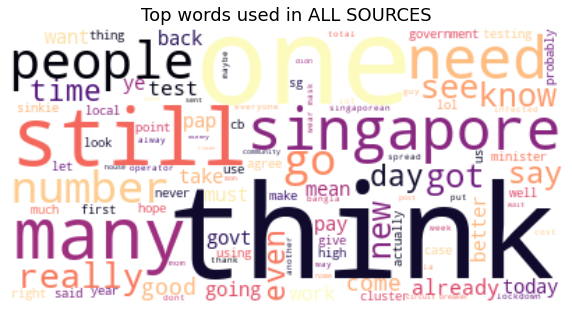

In [43]:
plots(train_posts['post_clean'], 'ALL SOURCES')

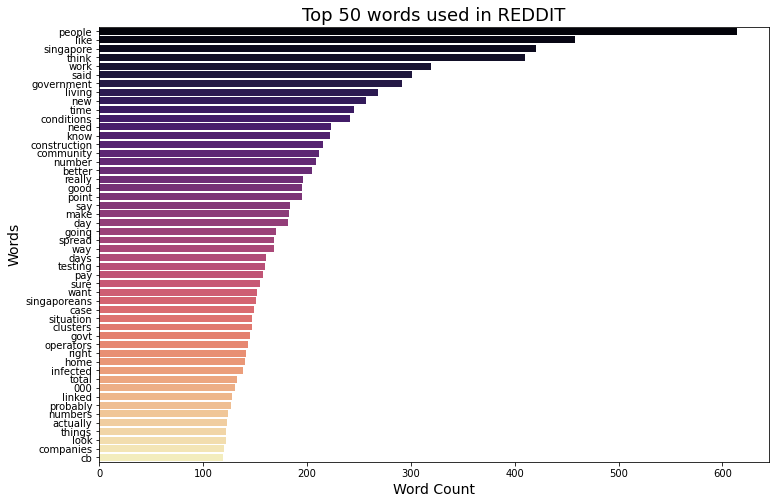

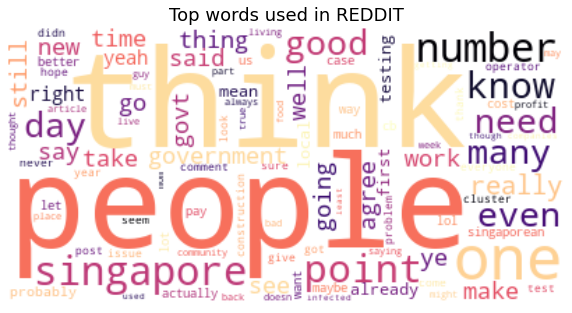

In [44]:
plots(train_posts['post_clean'][train_posts['source']=='reddit'], 'REDDIT')

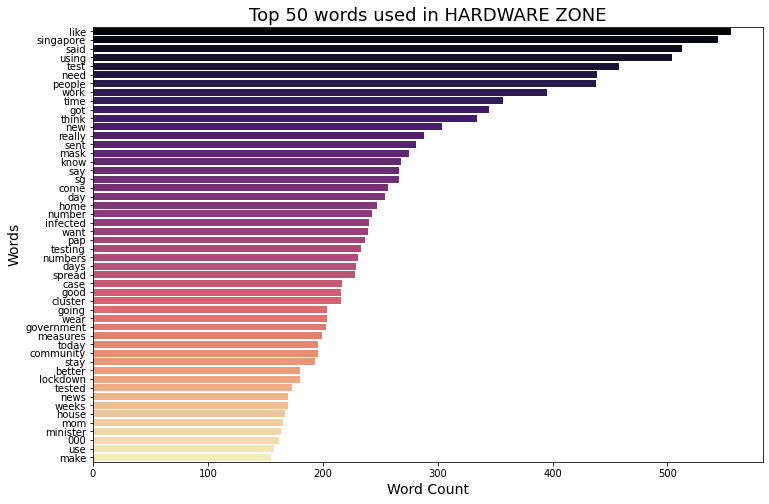

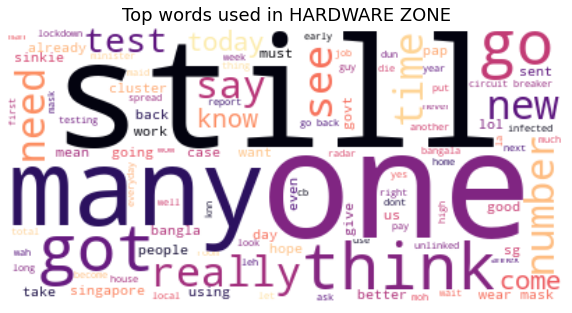

In [45]:
plots(train_posts['post_clean'][train_posts['source']=='hardwarezone'], 'HARDWARE ZONE')

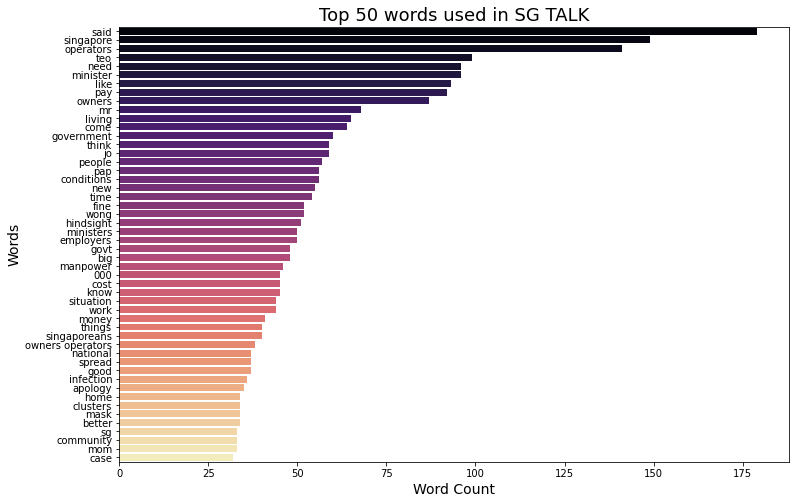

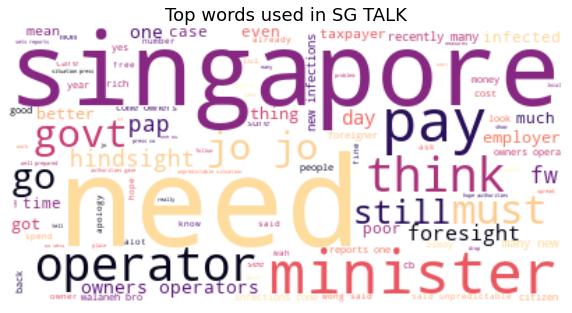

In [46]:
plots(train_posts['post_clean'][train_posts['source']=='sgtalk'], 'SG TALK')

#### Top bigrams for each source

In [47]:
def bigram_plots(series, source):
    
    cvec = CountVectorizer(stop_words = 'english', ngram_range=(2,3))
    cvec.fit_transform(series)
    series_df = pd.DataFrame(cvec.fit_transform(series).toarray(), 
                             columns=cvec.get_feature_names())
    wordcount_df = pd.DataFrame(series_df.sum().sort_values(ascending=False).head(50), 
                                  columns=['count'])
    
    #barplot 
    plt.figure(figsize = (12,8))
    sns.barplot(y = wordcount_df.index, x = 'count', data = wordcount_df, 
                palette = 'viridis')
    plt.title(f'Top 50 bigrams used in {source}', fontsize= 18)
    plt.xlabel('Word Count', fontsize = 14)
    plt.ylabel('Words',fontsize = 14)
    
    #wordcloud
    wc = WordCloud(max_words=100, background_color="white", 
                   colormap = 'viridis').generate(series.to_string())
    plt.figure(figsize = (10,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Top bigrams used in {source}', fontsize= 18)

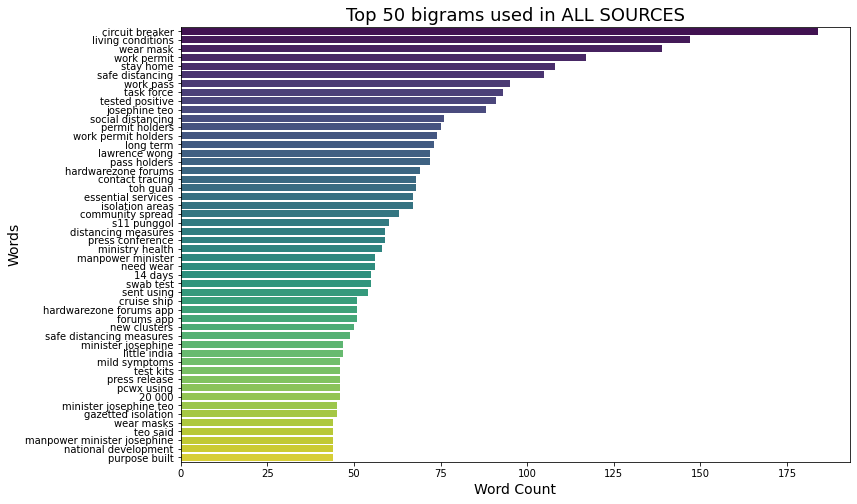

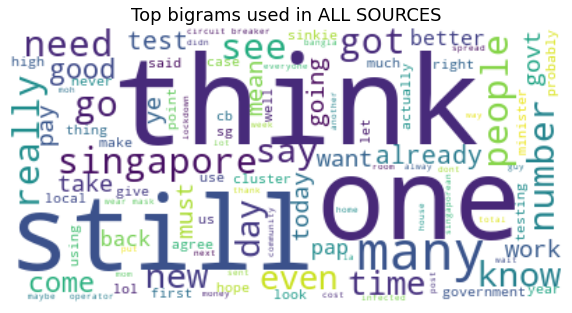

In [48]:
bigram_plots(train_posts['post_clean'], 'ALL SOURCES')

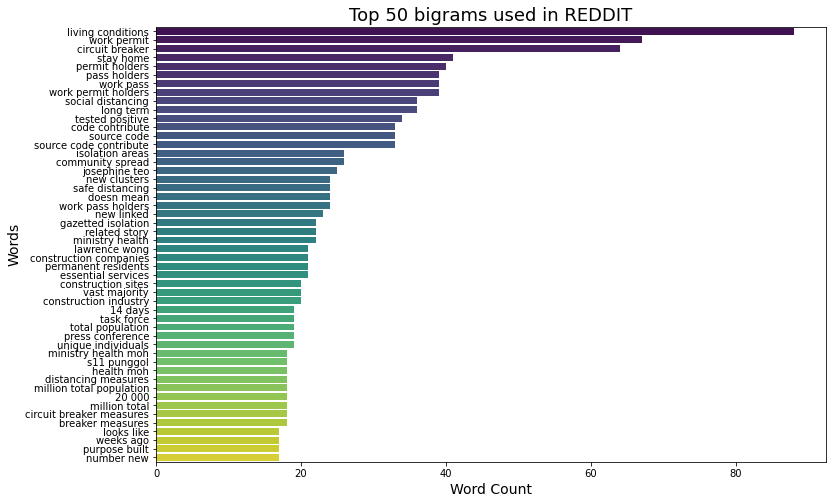

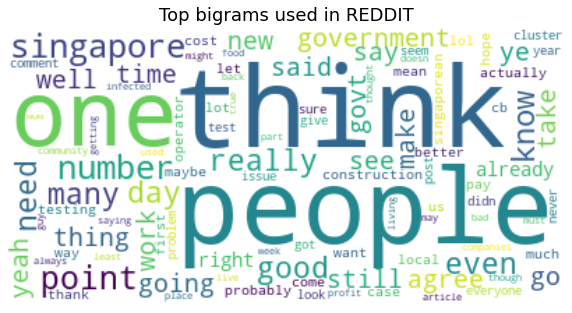

In [49]:
bigram_plots(train_posts['post_clean'][train_posts['source']=='reddit'], 'REDDIT')

/Users/dorafoong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dorafoong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dorafoong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dorafoong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dorafoong/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dorafoong/opt/anaconda3/lib/python3.7/

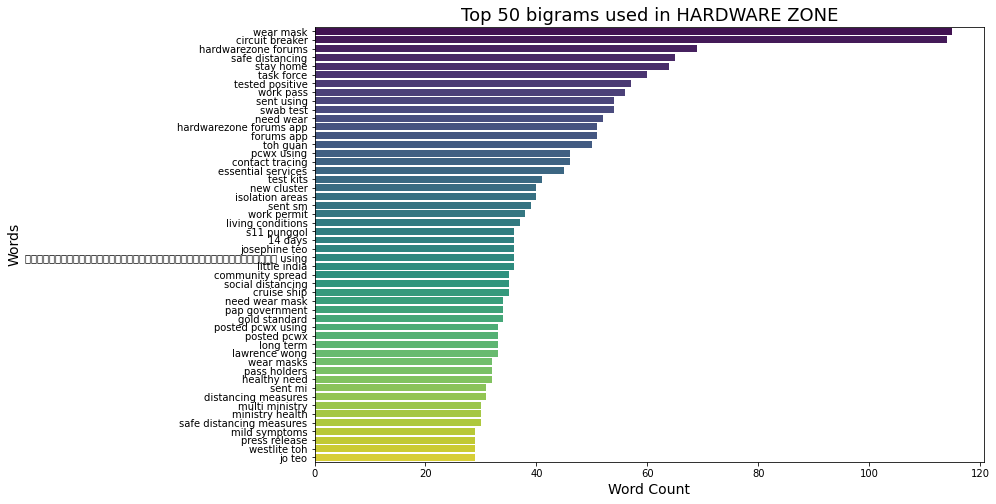

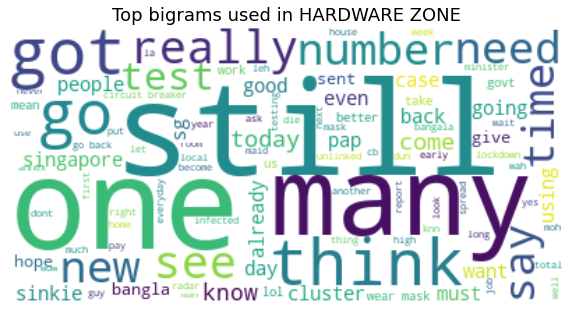

In [50]:
bigram_plots(train_posts['post_clean'][train_posts['source']=='hardwarezone'], 'HARDWARE ZONE')

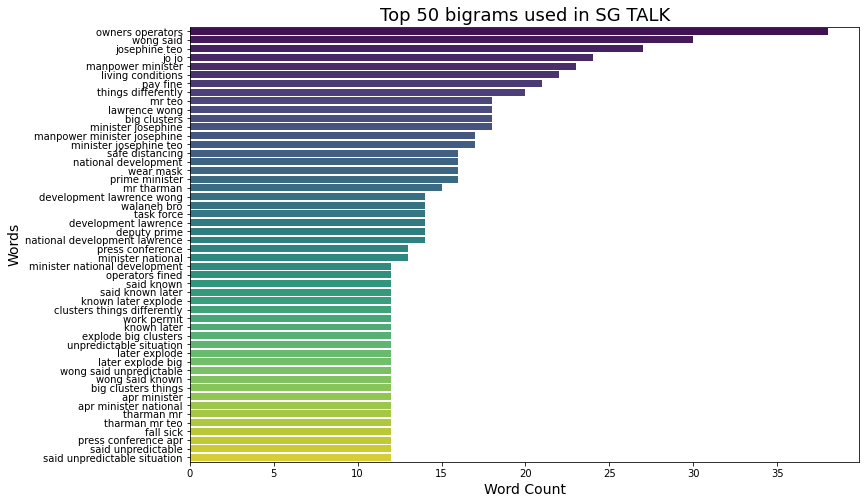

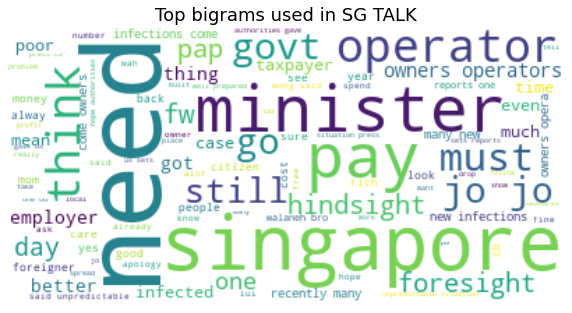

In [51]:
bigram_plots(train_posts['post_clean'][train_posts['source']=='sgtalk'], 'SG TALK')

### Drop ```word_count``` col for train as it does not exist in test data

In [52]:
train_posts.drop(columns = ['word_count'], inplace=True)
train_posts.head()

/Users/dorafoong/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,post,date,source,post_clean
3509,There is no new cluster beside the dorm for tw...,2020-10-04 08:34:00,hardwarezone,no new cluster beside two days
5372,">For consistency and accuracy, it could be eas...",2020-04-11 12:26:38,reddit,consistency accuracy could easier use data new...
6771,Only IQ lower than 86 will believe this CSB.Wh...,2020-04-23 10:42:00,hardwarezone,iq lower 86 believe csb maids pregnant nothing...
4972,I work nearby to the Westlite and Toh Guan Dor...,2020-04-06 20:55:47,reddit,work nearby westlite toh guan initial reports ...
59,Ho seh liao,2020-09-04 21:43:00,hardwarezone,ho seh


### Export ```all_words```, ```train_posts``` and ```test_posts```  dataframe

In [53]:
all_posts.to_csv("./all_posts.csv", index=False)
train_posts.to_csv("./train_posts.csv", index=False)
test_posts.to_csv("./test_posts.csv", index=False)